# <font color=900C3F>LIMPEZA DE DATOS (VALORES NULOS Y OUTLIERS)</font>

---

## <font color=#FF5733>REQUISITOS:</font>

> Los datos importados en este cuaderno han sido organizados en una fase anterior a esta, donde los datos, han pasado por un procesamiento de carga, tratamiento de estructura de columnas, traducción al español y fusion de los datos en un unico CSV.
> 
> El proceso de limpieza de los datos tiene como objetivo verificar si hay valores nulos y outiliers en el conjunto de datos importados a este cuaderno.
> 
> Outiliers son valores atípicos que pueden presentarse en un conjunto de datos y deben ser tratados.
> 
> El proceso de limpieza de Outiliers debe aplicar la técnica de los "Cuartiles" para eliminar los valores atípicos.
> 
> El proceso de tratamiento de Outliers empieza después del tratamiento de valores nulos.
>  
> Después de hacer la limpieza de los datos, este proceso debe generar un fichero en formato CSV, para ser usado en la proxima fase del proyecto.

---

## <font color=#FF5733>Importar Librerías</font>

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
%matplotlib inline

## <font color=#FF5733>Importar CSVs</font>

### <font color=#186a3b>--> Definir las rutas de los ficheros leídos y generados en el proceso de carga de datos </font>

In [63]:
# Definir la ruta donde se encuentra la carpeta y los CSVs que iremos trabajar
ruta_nuevoCSV = '../data/ficheros_procesados/datos_preprocesados_limpios.csv'
ruta_datos_preprocesados = '../data/ficheros_procesados/datos_preprocesados.csv'

# Creación del DataFrame
df = pd.read_csv(ruta_datos_preprocesados, delimiter=",", engine="python")
df.head(2)

,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
1,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139


### Cantidad de datos importados

In [64]:
df.shape

(54, 10)

### Estadística Descriptiva - SITUACIÓN ACTUAL

#### Estructura de columnas (tipos de datos)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           54 non-null     int64  
 1   Country                        54 non-null     object 
 2   Region                         54 non-null     object 
 3   Happiness Score                42 non-null     float64
 4   Economy (GDP per Capita)       42 non-null     float64
 5   Social support                 42 non-null     float64
 6   Health (Life Expectancy)       42 non-null     float64
 7   Freedom                        42 non-null     float64
 8   Trust (Government Corruption)  42 non-null     float64
 9   Generosity                     42 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.3+ KB


#### Resumen 1: Estadística Descriptiva

In [66]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Year,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,54.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,2019.00,7.33,1.54,1.36,0.82,0.63,0.34,0.25
std,2.61,0.44,0.25,0.20,0.14,0.10,0.16,0.09
min,2015.00,6.31,1.23,1.06,0.54,0.36,0.06,0.10
25%,2017.00,7.35,1.34,1.17,0.78,0.58,0.16,0.18
50%,2019.00,7.50,1.45,1.33,0.83,0.66,0.39,0.25
75%,2021.00,7.56,1.81,1.55,0.91,0.70,0.46,0.29
max,2023.00,7.84,2.00,1.64,1.06,0.77,0.54,0.48


#### Resumen 2: Estadística Descriptiva

In [67]:
# df.describe().round(2).T
df.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))


,count,mean,std,min,25%,50%,75%,max
Year,54.00,2019.00,2.61,2015.00,2017.00,2019.00,2021.00,2023.00
Happiness Score,42.00,7.33,0.44,6.31,7.35,7.50,7.56,7.84
Economy (GDP per Capita),42.00,1.54,0.25,1.23,1.34,1.45,1.81,2.00
Social support,42.00,1.36,0.20,1.06,1.17,1.33,1.55,1.64
Health (Life Expectancy),42.00,0.82,0.14,0.54,0.78,0.83,0.91,1.06
Freedom,42.00,0.63,0.10,0.36,0.58,0.66,0.70,0.77
Trust (Government Corruption),42.00,0.34,0.16,0.06,0.16,0.39,0.46,0.54
Generosity,42.00,0.25,0.09,0.10,0.18,0.25,0.29,0.48


## <font color=#FF5733>Tratar valores Nulos</font>

In [68]:
df.isnull().sum()

Year                              0
Country                           0
Region                            0
Happiness Score                  12
Economy (GDP per Capita)         12
Social support                   12
Health (Life Expectancy)         12
Freedom                          12
Trust (Government Corruption)    12
Generosity                       12
dtype: int64

Visualizar si hay valores nulos en la Gráfica

<Axes: >

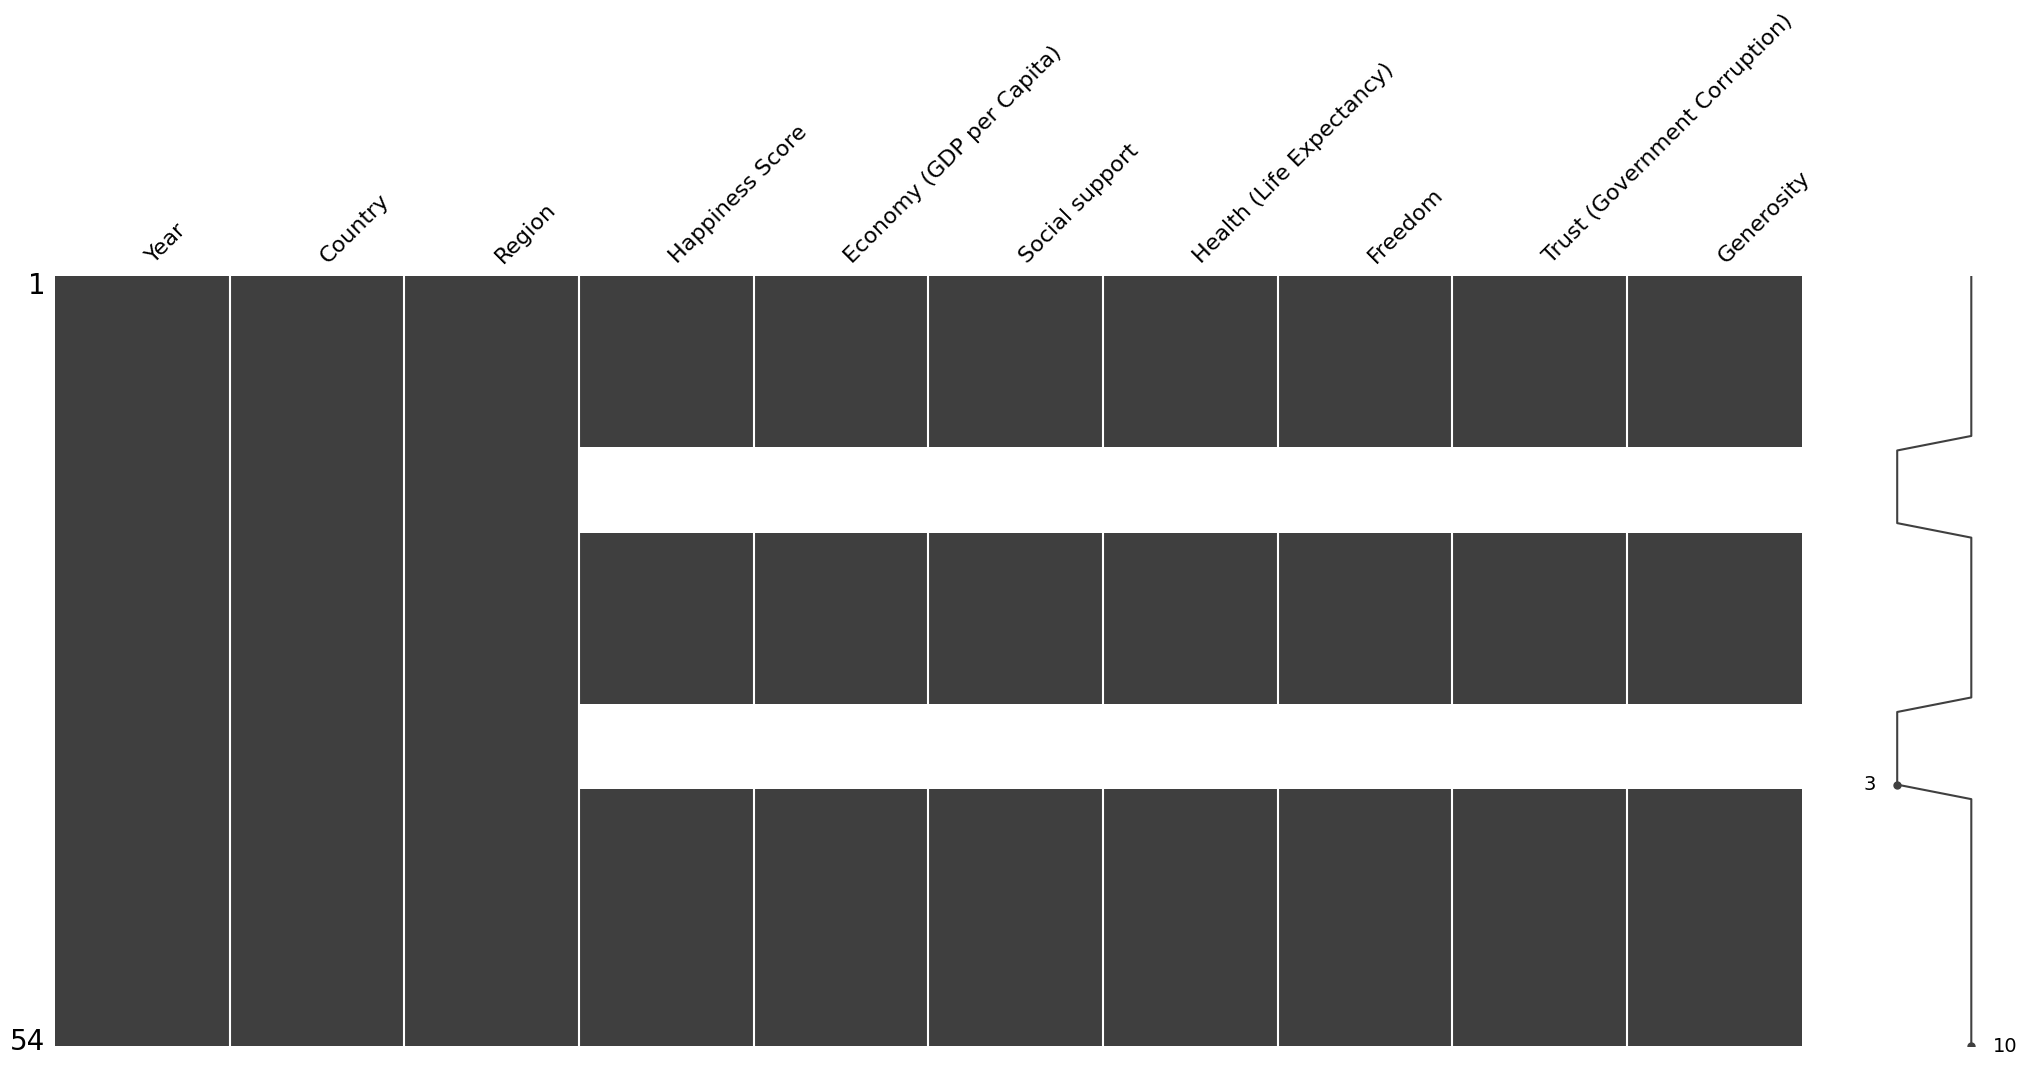

In [69]:
msno.matrix(df)

👨‍💻 `¡Importante!` 
><font color=#DAF>Hay valores nulos porque en la carga de los CSVs de 2017 y 2020 hemos detectado valores inválidos y hemos atribuído a estas columnas valores nulos para ser tratadas en este cuaderno.</font>

In [70]:
# función que recibe una lista de columnas, calcula la mediana
def nulos(dataframe, columns):
   resultado = pd.DataFrame(columns=['Columna', 'Valor_mediana'])
    
   for col in columns:
       median_value = dataframe[col].median()
       dataframe[col] = dataframe[col].fillna(median_value)

       resultado = pd.concat([resultado, pd.DataFrame({
           'Columna': [col],
           'Valor_mediana': [median_value]
       })], ignore_index=True)
   df_cuartil = resultado       
   return resultado

In [71]:
df.columns

Index(['Year', 'Country', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [72]:
numeric_columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Social support', \
                    'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', \
                    'Generosity']

# Llama la función "nulos" 
resultado = nulos(df, numeric_columns)
print(resultado)

                         Columna  Valor_mediana
0                Happiness Score       7.496500
1       Economy (GDP per Capita)       1.448905
2                 Social support       1.325475
3       Health (Life Expectancy)       0.828605
4                        Freedom       0.659400
5  Trust (Government Corruption)       0.393000
6                     Generosity       0.246500


In [94]:
df

,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Iceland,Western Europe,7.5610,1.302320,1.402230,0.947840,0.62877,0.14145,0.43630
1,2015,Denmark,Western Europe,7.5270,1.325480,1.360580,0.874640,0.64938,0.48357,0.34139
2,2015,Norway,Western Europe,7.5220,1.459000,1.330950,0.885210,0.66973,0.36503,0.34699
3,2015,Finland,Western Europe,7.4060,1.290250,1.318260,0.889110,0.64169,0.41372,0.23351
4,2015,Sweden,Western Europe,7.3640,1.331710,1.289070,0.910870,0.65980,0.43844,0.36262
5,2015,Spain,Western Europe,6.3290,1.230110,1.313790,0.955620,0.45951,0.06398,0.18227
6,2016,Denmark,Western Europe,7.5260,1.441780,1.163740,0.795040,0.57941,0.44453,0.36171
7,2016,Iceland,Western Europe,7.5010,1.426660,1.183260,0.867330,0.56624,0.14975,0.47678
8,2016,Norway,Western Europe,7.4980,1.577440,1.126900,0.795790,0.59609,0.35776,0.37895
9,2016,Finland,Western Europe,7.4130,1.405980,1.134640,0.810910,0.57104,0.41004,0.25492


In [73]:
df.shape

(54, 10)

## <font color=#FF5733>Análisis Exploratória - Valores Atípico (Outliers)</font>

Empezamos por analisar si hay valores atípico en nuestro conjunto de datos y luego identificamos por medio de las gráficas de bigotes (BoxPlot), cuales son los valores que estan fuera del Rango Intercuartil".

In [74]:
# funcion que dado un determinado dataframe genera una tabla con los valores de parámetros de Cuartiles que vamos 
# aplicar en el tramamiento de Outiers.
def calcular_estadisticas(df):
    # Crear un nuevo DataFrame para almacenar los resultados de los cuartiles
    resultados_df = pd.DataFrame(
        columns=[
            "Columna",
            "Cuartil 0.25",
            "Cuartil 0.50",
            "Cuartil 0.75",
            "Rango intercuartil",
        ]
    )

    # Crea una lista con las variables que queremos verificar los cuartiles
    numeric_columns = [
        "Happiness Score",
        "Economy (GDP per Capita)",
        "Social support",
        "Health (Life Expectancy)",
        "Freedom",
        "Trust (Government Corruption)",
        "Generosity"
    ]
    
       # Calcular los cuartiles y los rangos intercuartiles para cada columna
    for columna in numeric_columns:
        Q1 = df[columna].quantile(0.25)
        Q2 = df[columna].quantile(0.50)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        new_row = pd.DataFrame(
            {
                "Columna": columna,
                "Cuartil 0.25": Q1,
                "Cuartil 0.50": Q2,
                "Cuartil 0.75": Q3,
                "Rango intercuartil": IQR,
                "Limite inferior": limite_inferior,
                "Limite superior": limite_superior,
            },
            index=[0],
        )

        resultados_df = pd.concat([resultados_df, new_row], ignore_index=True)

    # retorna un nuevo DataFrame (resultados_df) con los resultados
    return resultados_df.head(15).round(2)

In [75]:
%%time 
# LLama la función para conocernos los valores de los parámetros del procesos de los cuartiles que iremos aplicar a 
# nuestro conjunto de datos. Esta tabla tambien sirve para la documentación del proyecto.
calcular_estadisticas(df)

CPU times: total: 46.9 ms
Wall time: 34 ms


,Columna,Cuartil 0.25,Cuartil 0.50,Cuartil 0.75,Rango intercuartil,Limite inferior,Limite superior
0,Happiness Score,7.37,7.50,7.55,0.18,7.09,7.83
1,Economy (GDP per Capita),1.38,1.45,1.53,0.16,1.14,1.77
2,Social support,1.22,1.33,1.51,0.29,0.78,1.94
3,Health (Life Expectancy),0.79,0.83,0.88,0.10,0.65,1.03
4,Freedom,0.59,0.66,0.69,0.09,0.45,0.83
5,Trust (Government Corruption),0.23,0.39,0.44,0.21,-0.08,0.75
6,Generosity,0.21,0.25,0.28,0.07,0.10,0.39


### <font color=#FF5733>Gráficas (Situación Actual)</font>


#### Diagrama de Caja y Bigotes (BoxPlot)

In [76]:
# Genera la gráfica de Bigote con todas las variables juntas
def generar_grafica_boxplot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.grid(True)
    plt.rcParams.update({"font.size": 10})  # Cambiar tamaño de la fuente
    
    # Generar el boxplot
    boxplot = dataframe.boxplot(
        column=[
            "Economy (GDP per Capita)",
            "Social support",
            "Health (Life Expectancy)",
            "Freedom",
            "Trust (Government Corruption)",
            "Generosity",
            "Happiness Score",       
        ],
        return_type="axes",
        showmeans=True
    )
    
    # Corregir la rotación del eje x
    ax = boxplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    
    return boxplot


CPU times: total: 93.8 ms
Wall time: 84 ms


matplotlib.axes._axes.Axes

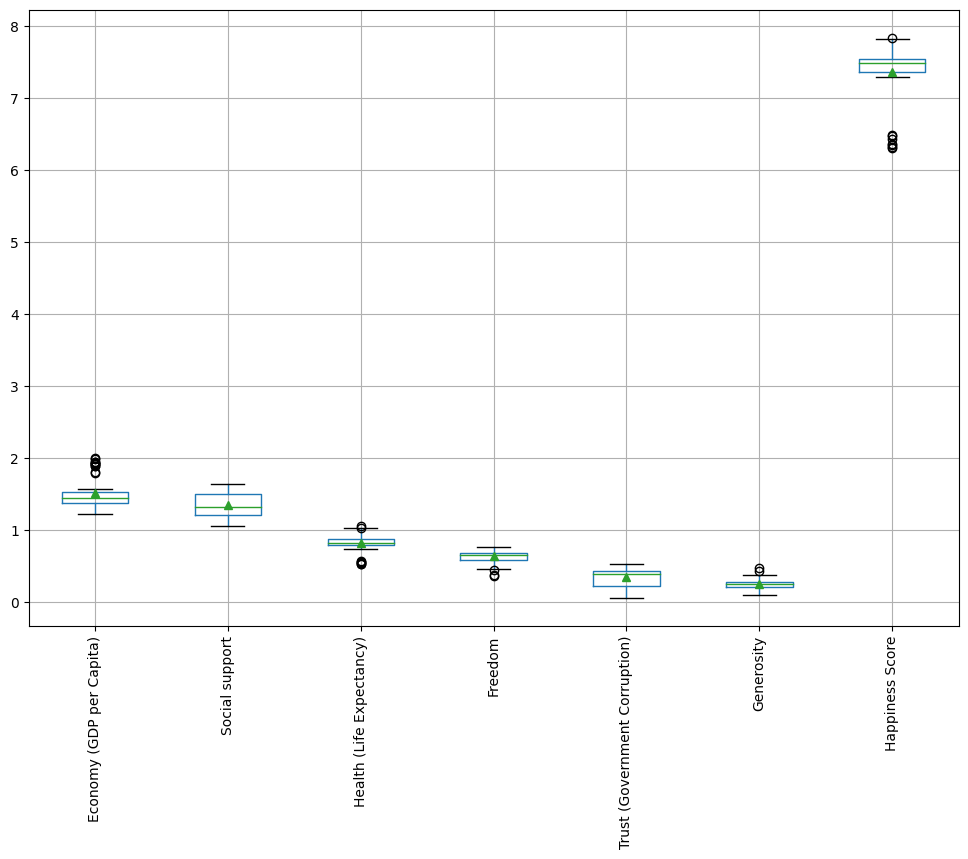

In [77]:
%%time 
# Llamada a la función
grafica = generar_grafica_boxplot(df)
type(grafica)

#### Diagrama de Caja y Bigotes (BoxPlot) generado individualmente para cada columna (variable)

In [78]:
# Define una función llamada "plot_boxplot"

# Crea el diagram de caja y bigote
def plot_boxplot(dataframe, columna):
    # Crea la gráfica boxplot
    dataframe.boxplot(column=[columna])

    # Elimina las líneas de cuadrícula
    plt.grid(False)

    # Apresenta la gráfica en pantalla
    plt.show()

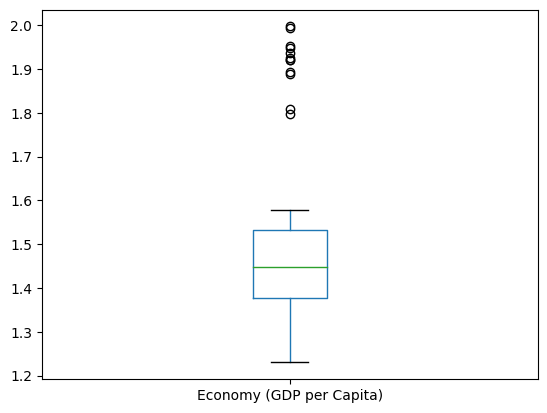

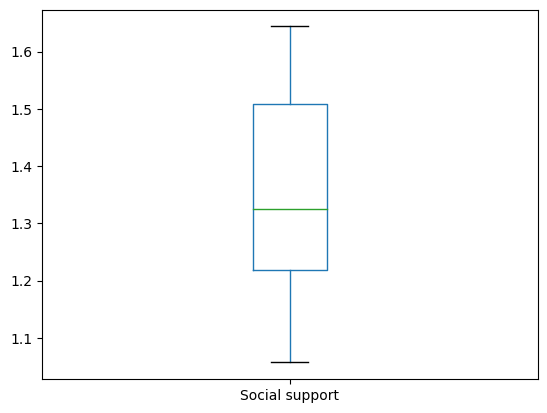

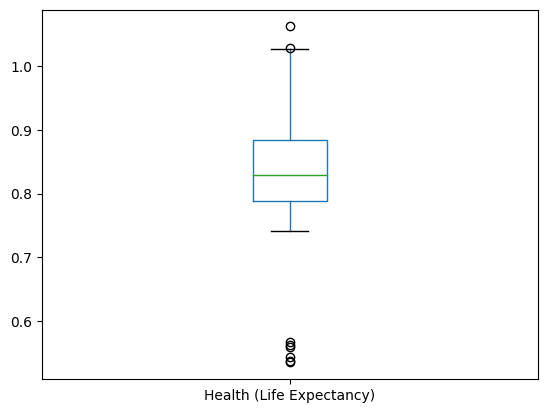

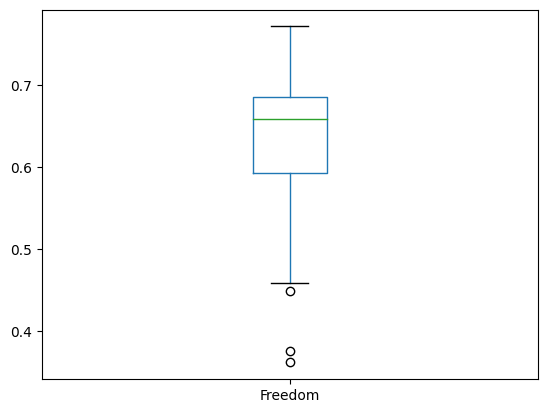

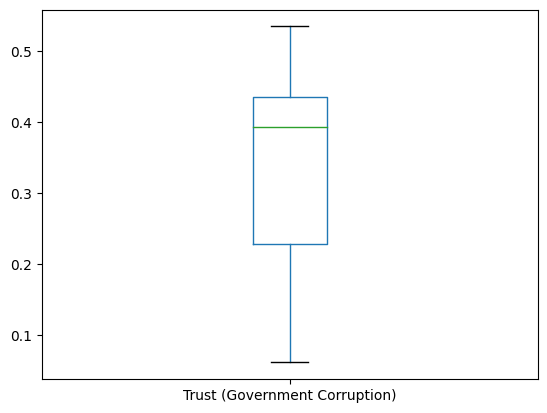

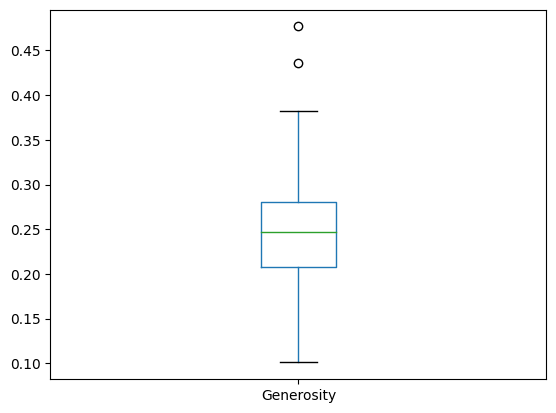

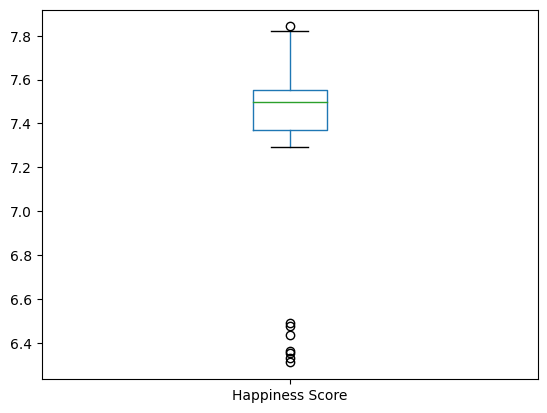

In [79]:
plot_boxplot(df, "Economy (GDP per Capita)")
plot_boxplot(df, "Social support")
plot_boxplot(df, "Health (Life Expectancy)")
plot_boxplot(df, "Freedom")
plot_boxplot(df, "Trust (Government Corruption)")
plot_boxplot(df, "Generosity")
plot_boxplot(df, "Happiness Score")


## <font color=#FF5733>Elimina Outliers - Empieza el proceso de limpieza de los valores atípicos</font>

In [80]:
# Define una función llamada "outliers" que devuelve una lista de valores atípicos basados em el IQR
# IQR = Q3 - Q1
# +/- 1.5*IQR

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.9 * IQR
    limite_superior = Q3 + 1.9 * IQR

    ls = df.index[(df[ft] < limite_inferior) | (df[ft] > limite_superior)]
    
    return ls

In [81]:

%%time 
# Busca y recompila los índices de los valores atípicos (outliers) en las columnas especificadas del conjunto de 
# datos "df"

# crea una lista vacía para almacenar los índices
index_list = []
for column in ["Happiness Score",
    "Economy (GDP per Capita)",
    "Social support",
    "Health (Life Expectancy)",
    "Freedom",
    "Trust (Government Corruption)",
    "Generosity"
]:
    index_list.extend(outliers(df, column))

CPU times: total: 31.2 ms
Wall time: 20 ms


In [82]:
# Define una función que devuelve un dataframe (marco de datos) limpio, sin valores atípicos
def eliminar(df, columna):
    columna = sorted(set(columna))
    df = df.drop(columna)
    return df

In [83]:
%%time 
df_limpio = eliminar(df, index_list)
df_limpio.head()

CPU times: total: 0 ns
Wall time: 1 ms


,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
1,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
2,2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
3,2015,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
4,2015,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
6,2016,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171


In [84]:
df_limpio.shape
print("Cantidad de datos importados en el CSV: ", df.shape, "\n", "Cantidad de datos limpios: ", df_limpio.shape)

Cantidad de datos importados en el CSV:  (54, 10) 
 Cantidad de datos limpios:  (33, 10)


### Gráficas (Después del proceso de limpeza de los Outliers)

CPU times: total: 93.8 ms
Wall time: 88 ms


matplotlib.axes._axes.Axes

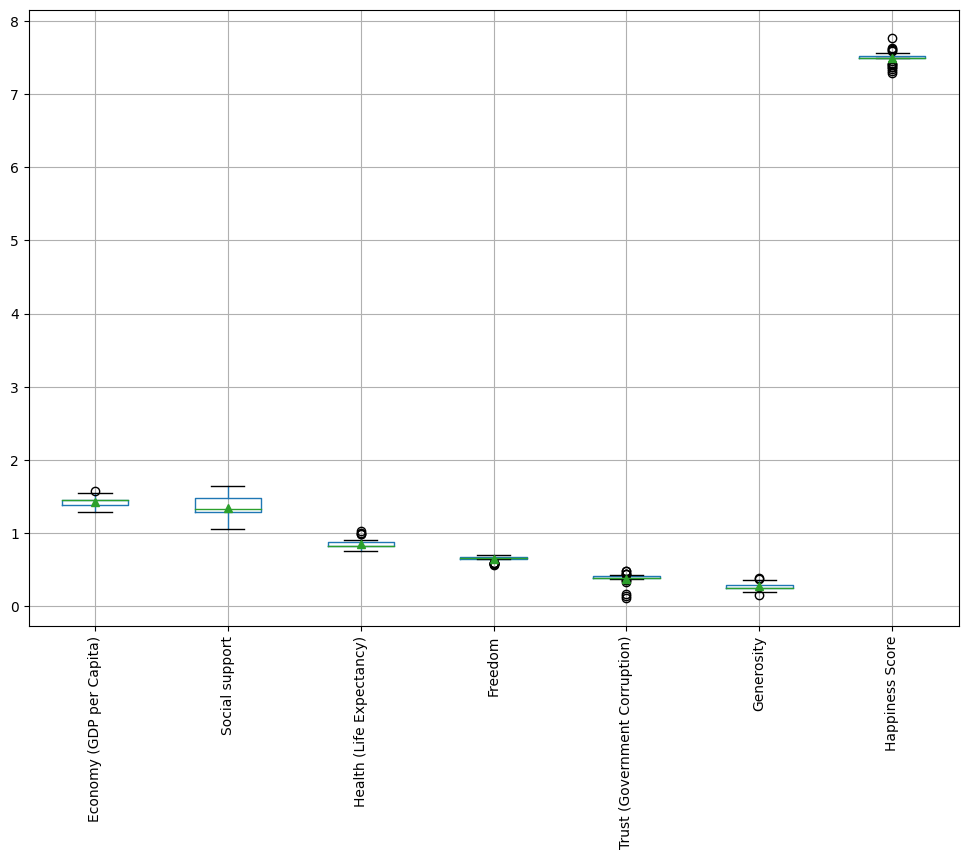

In [85]:
%%time 
# Llamada a la función
grafica = generar_grafica_boxplot(df_limpio)
type(grafica)

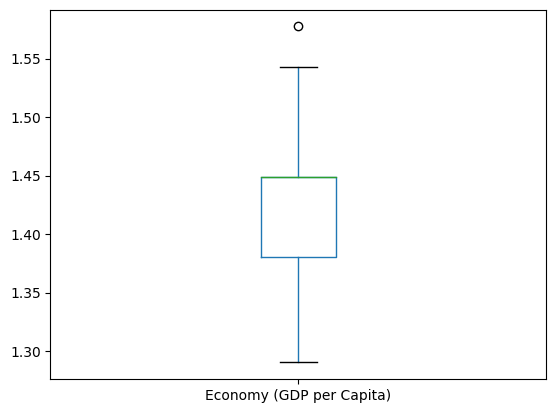

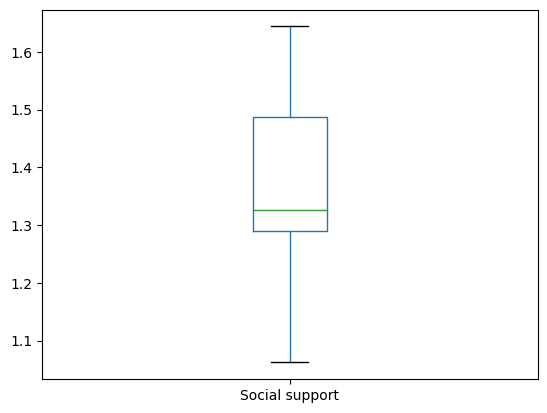

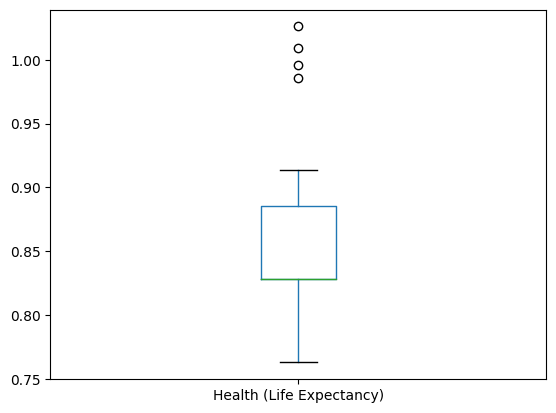

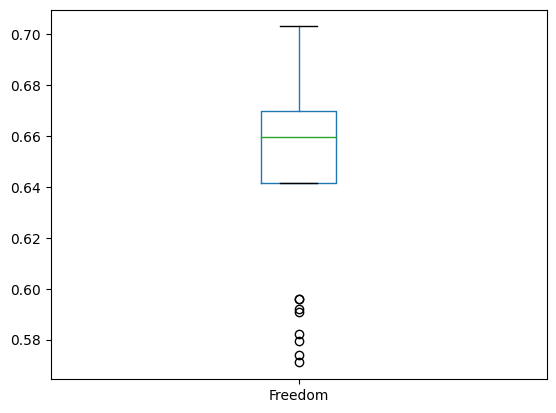

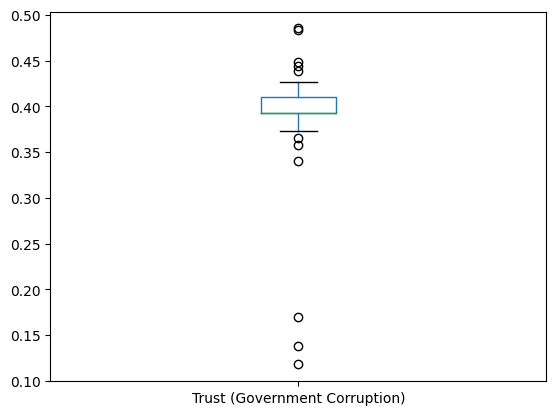

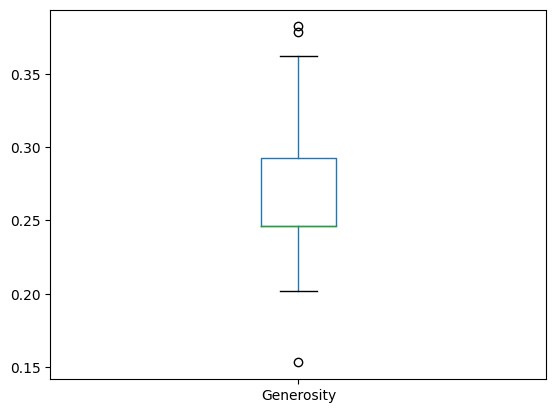

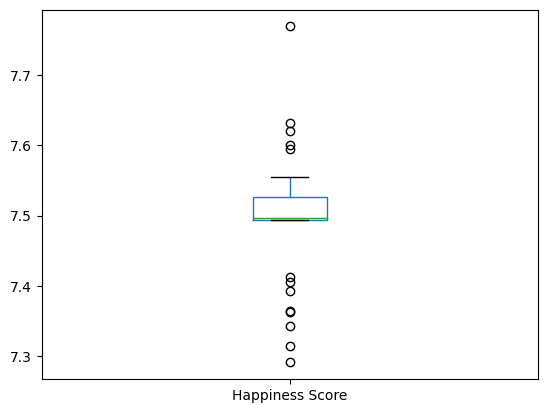

In [86]:
plot_boxplot(df_limpio, "Economy (GDP per Capita)")
plot_boxplot(df_limpio, "Social support")
plot_boxplot(df_limpio, "Health (Life Expectancy)")
plot_boxplot(df_limpio, "Freedom")
plot_boxplot(df_limpio, "Trust (Government Corruption)")
plot_boxplot(df_limpio, "Generosity")
plot_boxplot(df_limpio, "Happiness Score")

## <font color=#FF5733>Generar nuevo CSV con los datos limpios</font>

In [90]:
df_limpio.shape
df_limpio.describe().sum()

Year                             12144.012198
Happiness Score                     78.164676
Economy (GDP per Capita)            41.635170
Social support                      41.321111
Health (Life Expectancy)            38.256350
Freedom                             36.931052
Trust (Government Corruption)       35.260809
Generosity                          34.651393
dtype: float64

In [88]:
df_limpio.to_csv(ruta_nuevoCSV, index=False)